# Support Vector Machines com Python - Sem normalização

Bem vindo ao notebook sobre Support Vector Machines com Python! Lembre-se de se consultar o vídeo para obter informações completas sobre o código aqui!

## Importando bibliotecas

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Criando funções de apoio</h2>

<p>
<ul>Funções:
    <li>remove_features(lista_features): Remove colunas desnecessárias do dataset.</li>
    <li>acuracia(clf,X,y): Remove colunas desnecessárias do dataset.</li>
</ul>
</p>

In [11]:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

## Obter dados

Usaremos o conjunto de dados de câncer de mama incorporado da Scikit Learn. Podemos obter com a função load:

In [12]:
dataset = pd.read_csv('data.csv')

<h2>Verificando a distribuição dos dados</h2>
<p>As classes (1 e 0) não estão desbalanceadas.</p>

In [13]:
dataset['target'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64>

Podemos pegar informações e arrays deste dicionário para configurar nosso dataframe e entender os recursos:

In [14]:
dataset

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.034400,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.604000,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.180000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.020200,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.048100,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.002080,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


Checando Missing Values
Missing Values são valores faltantes, ou seja, valores nulos em colunas por exemplo.

dataset.isnull().sum()

In [15]:
dataset.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

<h2>Informações da base de dados</h2>
<ul><b>Informações técnicas da base de dados:</b>
<li>** time_signature **: Andamento rítmico das músicas. (4, 3, 2 ,1)</li>
<li>acousticness: Índice de confiança se a música é acústica ou não. Valores entre 1 e 0 onde um valor 1 é uma música totalmente acústica e um valor 0 ou próximo diz que a música não tem elementos de música acústica.</li>
<li>danceability: Índice de “dançabilidade” da música, um valor 1 ou muito próximo diz que essa música tem um ritmo forte e é estável na qual seria mais “dançável”.</li>
<li>duration_ms: Duração da música em milissegundos.</li>
<li>energy: Índice de energia de uma música, onde os valores variam entre 0 a 1. Valores próximos de 1 significam músicas mais intensas, e mais barulhentas. Por exemplo, músicas de Heavy Metal são mais barulhentas e mais enérgicas que uma música Clássica.</li>
<li>instrumentalness: Índice de instrumental que a música possui. Uma música com o valor 1 significa uma música totalmente instrumental, ou seja, não contém voz na música. Já um RAP não é totalmente instrumental mas contém bastante letra, logo esse índice seria próximo de 1.</li>
<li>valence: Índice descrevendo a positividade da música, valores 1 ou próximo de 1 significam músicas mais positivas, mais alegres, que possuem harmonias mais alegres. Valores próximos a zero seriam músicas mais tristes com uma harmonia mais “dark”.</li>
<li>song_title: Nome da música.</li>
<li>artist: Nome da banda ou artista.</li>
</ul>
<p>Para informações sobre o dataset, utilizamos o método describe: <i>dataset.describe()</i></p>
<p>Esse método mostra o número de linhas, valor médio, valor mínimo, valor máximo e informações de quartis de todas as colunas numéricas da base.</p>

In [16]:
dataset['target'].describe()

count    2017.000000
mean        0.505702
std         0.500091
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [17]:
dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Análise exploratória de dados

Uma vez que esses dados são artificiais, vamos criar um grande pairplot com o Seaborn.

** Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna TARGET CLASS. **

LinAlgError: singular matrix

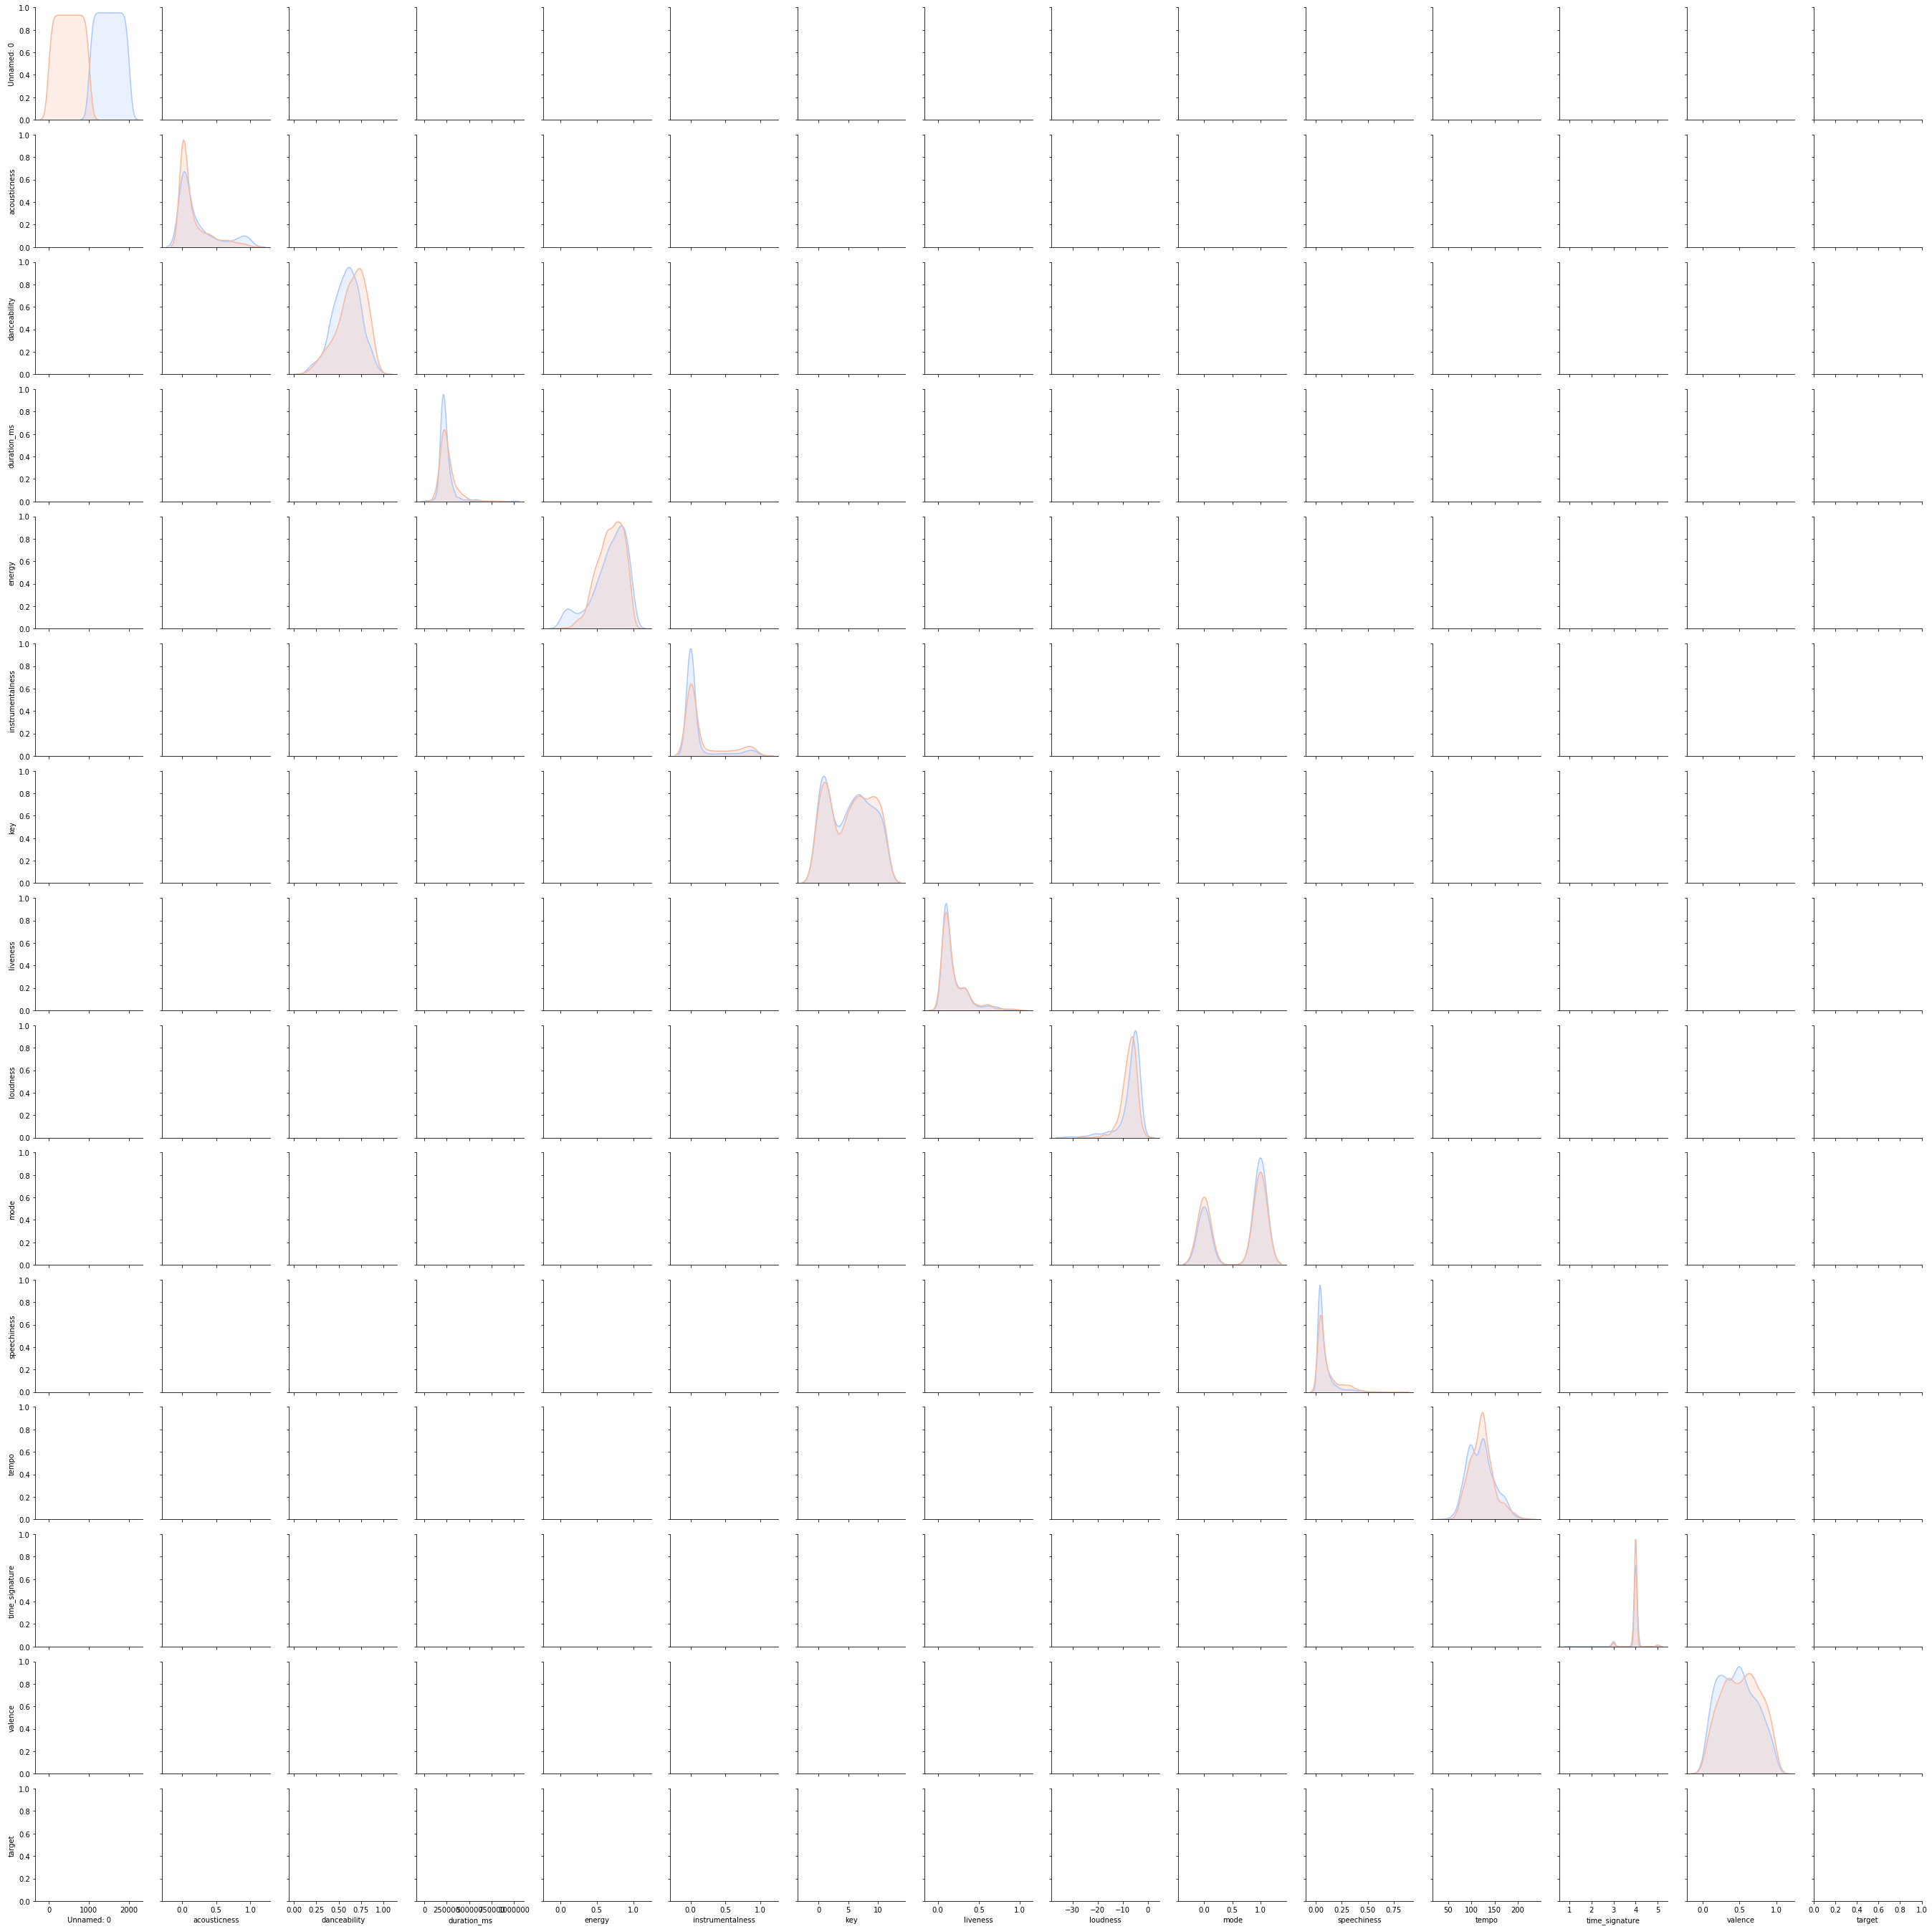

In [18]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(dataset,hue='target',palette='coolwarm')

## Configurando o DataFrame

<h2>Separando os dados de classes - Spotify</h2>

In [19]:
classes = dataset['target']

In [20]:
# transformando o dataset "classes' em array
classes_array = classes.values

<h2>Removendo colunas que não fazem sentido para o problema</h2>
<p>No caso as colunas <i>'song_title' e 'target'</i></p>
<p>remove_features() criada no início do programa.</p>

In [21]:
#remove_features(['target','song_title'])
remove_features(['song_title','Unnamed: 0'])

0

<h4>Label Encoder</h4>
<p>Antes de executarmos o algoritmo 'One Hot Encoder' precisamos transformar os valores categóricos em numéricos através do utilitário <b>Label Encoder</b> da biblioteca sklearn.preprocessing.</p>

In [22]:
#Pré-processamento dos dados
from sklearn.preprocessing import LabelEncoder

In [23]:
#objeto to tipo LabelEncoder
enc = LabelEncoder()

In [24]:
#criar uma variável que irá receber os dados convertidos para inteiro:
inteiros = enc.fit_transform(dataset['artist'])

In [25]:
#adicionar uma coluna no meu dataset chamada ‘artist_inteiros’ 
dataset['artist_inteiros'] = inteiros

In [26]:
remove_features(['artist','target'])

0

## Divisão treino-teste

In [27]:
df_feat = dataset

In [28]:
df_target = classes

In [29]:
df_feat

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.034400,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.604000,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.180000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628
5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,356
6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,356
7,0.020200,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,869
8,0.048100,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,321
9,0.002080,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,516


In [30]:
df_target

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

# Treinando o Support Vector Classifier

In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC()

In [35]:
model.fit(X_train,y_train)

C:\Users\julio\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Previsões e avaliações

Agora vamos prever o uso do modelo treinado.

In [36]:
predictions = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,predictions))

[[  1 302]
 [  1 302]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.00      0.01       303
           1       0.50      1.00      0.67       303

   micro avg       0.50      0.50      0.50       606
   macro avg       0.50      0.50      0.34       606
weighted avg       0.50      0.50      0.34       606



Note que estamos classificando tudo em uma única classe! Isso significa que nosso modelo precisa ter parâmetros ajustados (também pode ajudar a normalizar os dados).

Podemos procurar por parâmetros usando um GridSearch!

# Gridsearch

Encontrar os parâmetros certos (como o que o C ou os valores de gama para usar) é uma tarefa complicada! Mas, felizmente, podemos ser um pouco preguiçosos e apenas tentar um monte de combinações e ver o que funciona melhor! Essa idéia de criar uma "grade" de parâmetros e apenas experimentar todas as combinações possíveis é chamada Gridsearch, esse método é comum o suficiente para que o Scikit-learn tenha essa funcionalidade incorporada no GridSearchCV!

O GridSearchCV usa um dicionário que descreve os parâmetros que devem ser testados e um modelo para treinar. A grade de parâmetros é definida como um dicionário, onde as chaves são os parâmetros e os valores são as configurações a serem testadas.

In [40]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [41]:
from sklearn.model_selection import GridSearchCV

Uma das grandes coisas do GridSearchCV é que é um meta-estimador. Ele pega um estimador como SVC e cria um novo estimador, que se comporta exatamente da mesma forma - neste caso, como um classificador. Você deve adicionar refit=True e escolher detalhadamente para  número desejado, maior o número, mais detalhado. 

Você deve adicionar refit=True e escolher  um número para o parâmetro verbose. Quanto maior o número, mais detalhamento teremos.

In [42]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

O que o fit faz é um pouco mais complicado do que o habital. Primeiro, ele executa o mesmo loop com validação cruzada, para encontrar a melhor combinação de parâmetros. Uma vez que tenha a melhor combinação, ele corre novamente em todos os dados para fitá-los (sem validação cruzada), para construir um único modelo novo usando a melhor configuração de parâmetro.

In [43]:
# Talvez demore um pouco
grid.fit(X_train,y_train)

C:\Users\julio\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5074309978768577, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5085106382978724, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5085106382978724, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5074309978768577, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5085106382978724, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5085106382978724, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5074309978768577, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5085106382978724, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5085106382978724, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.5680851063829787, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5116772823779193, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5106382978723404, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5106382978723404, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5116772823779193, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5106382978723404, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5106382978723404, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ...

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

Você pode inspecionar os melhores parâmetros encontrados pelo GridSearchCV no atributo best_params_ e o melhor estimador no melhor atributo \ _estimator_:

In [44]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [45]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Então você pode re-executar previsões neste objeto da grade exatamente como você faria com um modelo normal.

In [46]:
grid_predictions = grid.predict(X_test)

In [47]:
print(confusion_matrix(y_test,grid_predictions))

[[ 81 222]
 [ 67 236]]


In [48]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.55      0.27      0.36       303
           1       0.52      0.78      0.62       303

   micro avg       0.52      0.52      0.52       606
   macro avg       0.53      0.52      0.49       606
weighted avg       0.53      0.52      0.49       606

